In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Walmart.csv")
data.head()
plt.rcParams['lines.linewidth'] = 2

## Limpieza de datos   

In [4]:
data[["Order Date","Ship Date"]] = data[["Order Date","Ship Date"]].apply(pd.to_datetime, errors='coerce')
data["Quantity"]= data["Quantity"].astype("int32")
data.drop(columns="Country",inplace=True)

C:\Users\Rainier\AppData\Local\Temp\ipykernel_9944\374795057.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[["Order Date","Ship Date"]] = data[["Order Date","Ship Date"]].apply(pd.to_datetime, errors='coerce')
C:\Users\Rainier\AppData\Local\Temp\ipykernel_9944\374795057.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data[["Order Date","Ship Date"]] = data[["Order Date","Ship Date"]].apply(pd.to_datetime, errors='coerce')


### Cambiar nombres para ser mejor  

In [5]:
data.columns = data.columns.str.replace(" ","_")
data.columns = data.columns.str.lower()

### Crear dos columnas nuevas una del año y otra del mes 

In [6]:
data["year"] = data["order_date"].dt.year
data["month"] = data["order_date"].dt.month
data.head()

,order_id,order_date,ship_date,customer_name,city,state,category,product_name,sales,quantity,profit,year,month
0,CA-2013-138688,2013-06-13,2013-06-17,Darrin Van Huff,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2,6.87,2013,6
1,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7,14.17,2011,6
2,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,Los Angeles,California,Art,Newell 322,7.28,4,1.97,2011,6
3,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4,90.72,2011,6
4,CA-2011-115812,2011-06-09,2011-06-14,Brosina Hoffman,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3,5.78,2011,6


### Analisis de datos

## Que estado tuvo mejores ventas 


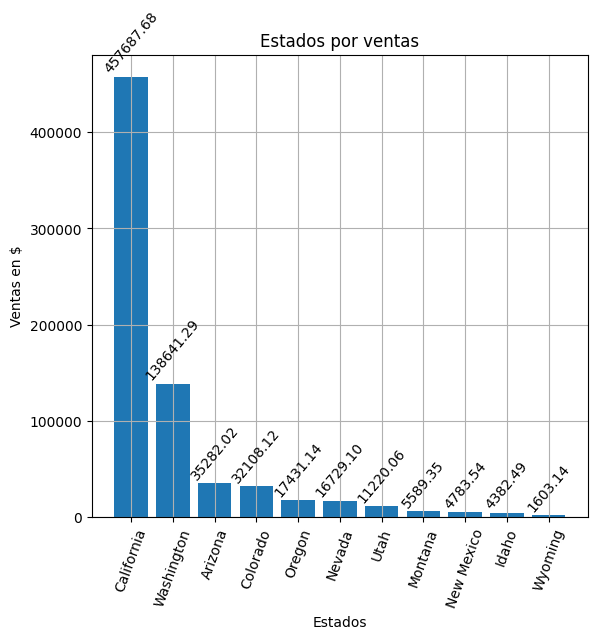

In [7]:
sales = data.groupby("state").sum(numeric_only=True)[['sales']].reset_index().sort_values(by="sales",ascending=False)
sales.head()

plt.figure().set_figheight(6)
plt.title("Estados por ventas")
plt.xticks(rotation=70)
plt.xlabel("Estados")
plt.ylabel("Ventas en $")
plt.bar(sales['state'],sales['sales'])
plt.grid()
for x,y in zip(sales['state'],sales['sales']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center',
                 rotation=50)
plt.show()

### Que categorias fueron las mas vendidas por año 

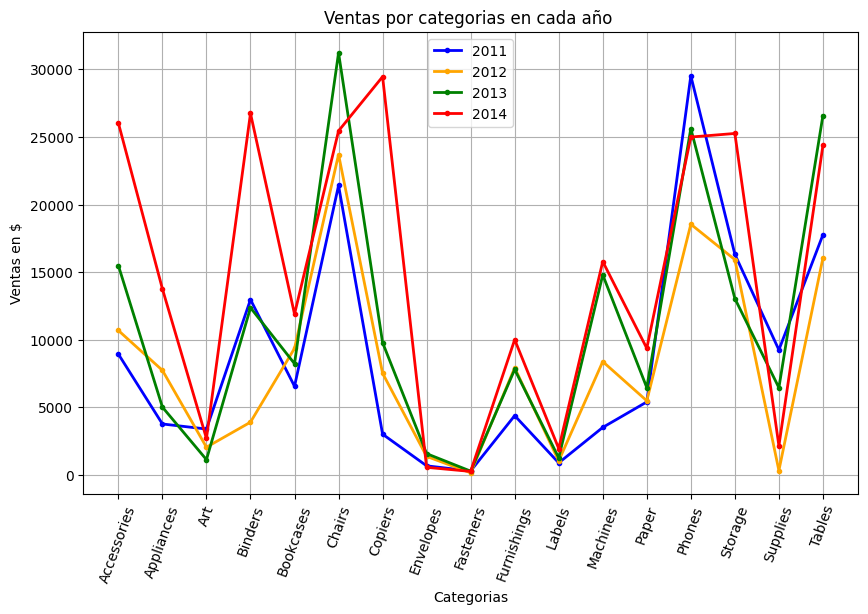

In [8]:
categories = data.groupby(["year","category"]).sum(numeric_only=True).reset_index()
c2011 = categories[categories["year"]==2011][['year','category',"sales"]]
c2012 = categories[categories["year"]==2012][['year','category',"sales"]]
c2013 = categories[categories["year"]==2013][['year','category',"sales"]]
c2014 = categories[categories["year"]==2014][['year','category',"sales"]]
plt.figure(figsize=(10,6))
plt.title("Ventas por categorias en cada año ")

plt.xticks(rotation=70)
plt.xlabel("Categorias")
plt.ylabel("Ventas en $")
plt.grid()
plt.plot(c2011['category'],c2011['sales'],color="blue",label="2011", marker='.')
plt.plot(c2012['category'],c2012['sales'],color="orange",label="2012", marker='.')
plt.plot(c2013['category'],c2013['sales'],color="green",label="2013",marker='.')
plt.plot(c2014['category'],c2014['sales'],color="red",label="2014",marker='.')
plt.legend()
plt.show()

### Que categoria vendio mas en general

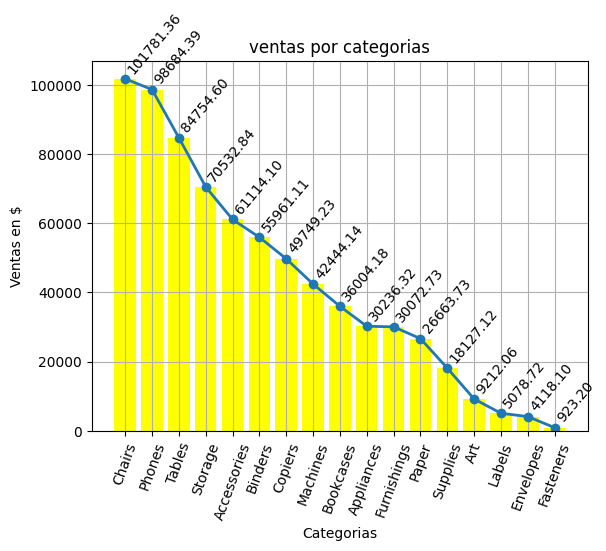

In [9]:
sales_total = data.groupby("category").sum(numeric_only=True).reset_index().sort_values(by="sales",ascending=False)
sales_total.head()
plt.title("ventas por categorias")
plt.grid()
plt.xticks(rotation=70)
plt.xlabel("Categorias")
plt.ylabel("Ventas en $")
plt.bar(sales_total['category'],sales_total['sales'],color="yellow")
plt.plot(sales_total['category'],sales_total['sales'],marker="o")
for x,y in zip(sales_total['category'],sales_total['sales']):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,4), # distance from text to points (x,y)
                 ha='left',
                 rotation=50) # horizontal alignment can be left, right or center
plt.show()

### Cuales fueron los porcentajes de los meses en los que mas se vendio 

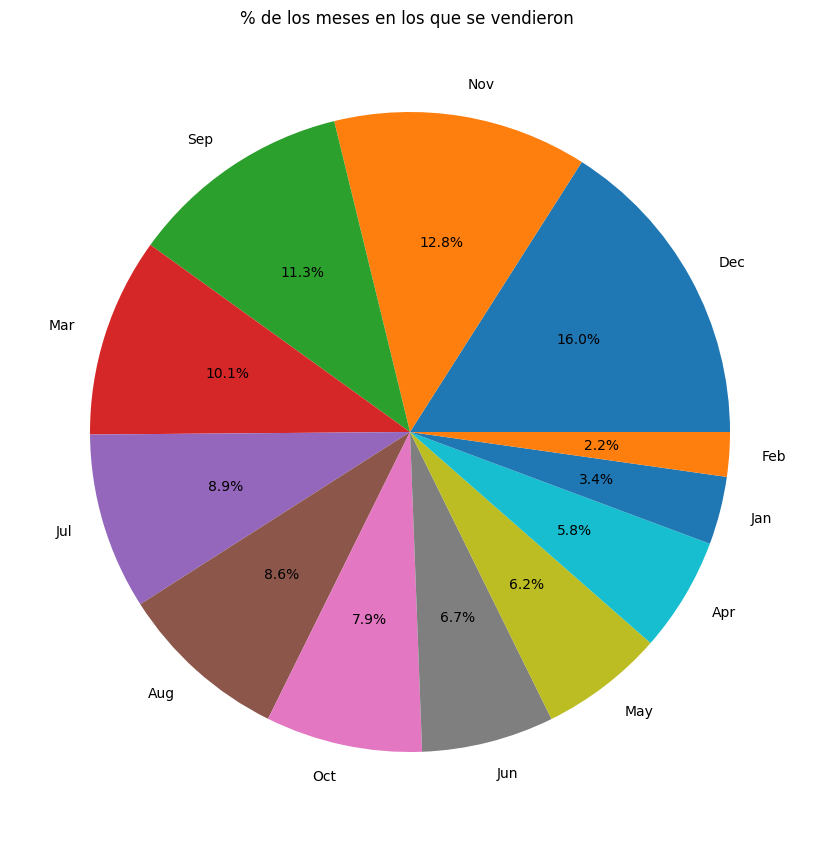

In [12]:
import calendar as cal
months = data.groupby("month").sum(numeric_only=True).sort_values(by='sales',ascending=False).reset_index()
list_month=list(months['month'])
abr =list()
for i in list_month:
    abr.append(cal.month_abbr[i])

list_sales = list(months['sales'])
list_sales

fig, ax = plt.subplots(figsize=(15, 8))
fig.subplots_adjust(0.1,0,1,1)
ax.pie(list_sales, labels=abr, autopct='%1.1f%%')

plt.title("% de los meses en los que se vendieron ")


plt.show()

### Cantidad de ventas por categorias

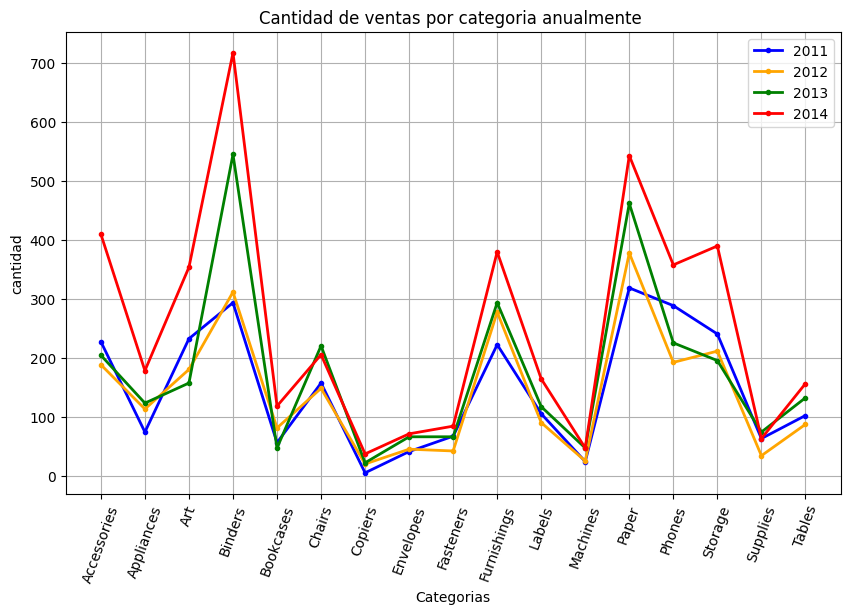

In [13]:
quantity =data.groupby(["category","year"]).sum(numeric_only=True).reset_index()
q2011 = quantity[quantity["year"]==2011][['year','category',"sales",'quantity']]
q2012 = quantity[quantity["year"]==2012][['year','category',"sales",'quantity']]
q2013 = quantity[quantity["year"]==2013][['year','category',"sales",'quantity']]
q2014 = quantity[quantity["year"]==2014][['year','category',"sales",'quantity']]
plt.figure(figsize=(10,6))
plt.title("Cantidad de ventas por categoria anualmente ")

plt.xticks(rotation=70)
plt.xlabel("Categorias")
plt.ylabel("cantidad")
plt.grid()
plt.plot(q2011['category'],q2011['quantity'],color="blue",label="2011", marker='.')
plt.plot(q2012['category'],q2012['quantity'],color="orange",label="2012", marker='.')
plt.plot(q2013['category'],q2013['quantity'],color="green",label="2013",marker='.')
plt.plot(q2014['category'],q2014['quantity'],color="red",label="2014",marker='.')
plt.legend()
plt.show()
